In [1]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt

### London dataset EDA 

About Dataset
Context
London is the capital and most populous city of England and the United Kingdom. Standing on the River Thames in the south east of the island of Great Britain, London has been a major settlement for two millennia. Source: https://en.wikipedia.org/wiki/London

Dataset contains 6 columns
1) date
2) area
3)average_price
4)code
5)house_sold
6)no_of_crimes

In [2]:
df = pd.read_csv('London_housing_Data.csv')

In [3]:
df.shape

(13549, 6)

In [4]:
df.head()

,date,area,average_price,code,houses_sold,no_of_crimes
0,1/1/1995,city of london,91449,E09000001,17.0,NaN
1,2/1/1995,city of london,82203,E09000001,7.0,NaN
2,3/1/1995,city of london,79121,E09000001,14.0,NaN
3,4/1/1995,city of london,77101,E09000001,7.0,NaN
4,5/1/1995,city of london,84409,E09000001,10.0,NaN


As we can see some Nan values on no_of_crimes column so we will check for missing values in the whole dataset

In [5]:
df.isnull().sum()

date                0
area                0
average_price       0
code                0
houses_sold        94
no_of_crimes     6110
dtype: int64

<AxesSubplot:>

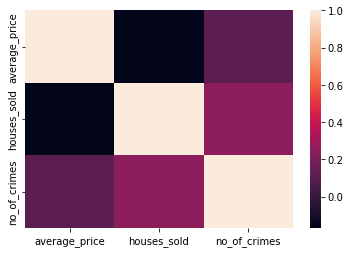

In [6]:
sb.heatmap(df.corr())

<AxesSubplot:>

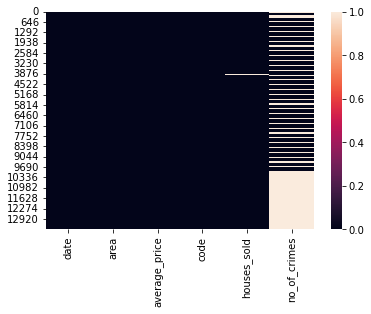

In [7]:
sb.heatmap(df.isnull())

In [8]:
df['date'] = pd.to_datetime(df['date'])

In [9]:
df.head(2)

,date,area,average_price,code,houses_sold,no_of_crimes
0,1995-01-01,city of london,91449,E09000001,17.0,NaN
1,1995-02-01,city of london,82203,E09000001,7.0,NaN


In [11]:
# Adding a new column 'year' to the dataframe
df['year'] = df['date'].dt.year

In [12]:
df.head(2)

,date,area,average_price,code,houses_sold,no_of_crimes,year
0,1995-01-01,city of london,91449,E09000001,17.0,NaN,1995
1,1995-02-01,city of london,82203,E09000001,7.0,NaN,1995


In [13]:
# Now adding a new column 'month' for into the dataframe as the second column(use the insert command)
df.insert(2,'month',df.date.dt.month)


### Show all the records where crime is 0 

In [16]:
zero_crime = df[df['no_of_crimes']==0]
zero_crime.head()

,date,area,month,average_price,code,houses_sold,no_of_crimes,year
72,2001-01-01,city of london,1,284262,E09000001,24.0,0.0,2001
73,2001-02-01,city of london,2,198137,E09000001,37.0,0.0,2001
74,2001-03-01,city of london,3,189033,E09000001,44.0,0.0,2001
75,2001-04-01,city of london,4,205494,E09000001,38.0,0.0,2001
76,2001-05-01,city of london,5,223459,E09000001,30.0,0.0,2001


In [17]:
# No of area with zero crime
print(len(zero_crime))

104


### Whats is the maximum,average and minimum price of house in city of london?

In [18]:
london_price = df[df['area']=='city of london']
min_price_london = min(london_price['average_price'])
max_price_london = max(london_price['average_price'])

In [20]:
print('minimum of average price in london is {} and maximum is {}'.format(min_price_london,max_price_london))

minimum of average price in london is 77101 and maximum is 939912


### what is the maximum and minimum 'average_price' per year in England? 

In [35]:
# Minimum average price of england over the years
min_price_england = df[df['area']=='england'].groupby('year')['average_price'].min().reset_index()
min_price_england.head()

,year,average_price
0,1995,52788
1,1996,52333
2,1997,55789
3,1998,61659
4,1999,65522


<AxesSubplot:xlabel='year', ylabel='average_price'>

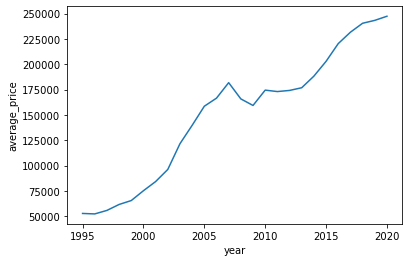

In [38]:
sb.lineplot(x='year',y='average_price',data=min_price_england)

In [36]:
# Maximum average price of england over the years
max_price_england = df[df['area']=='england'].groupby('year')['average_price'].max().reset_index()
max_price_england.head()

,year,average_price
0,1995,53901
1,1996,55755
2,1997,61564
3,1998,65743
4,1999,75071


<AxesSubplot:xlabel='year', ylabel='average_price'>

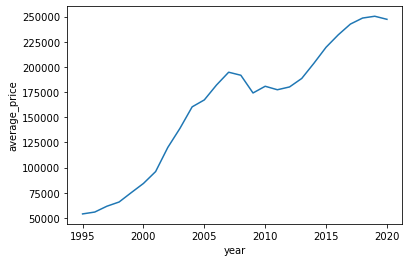

In [37]:
sb.lineplot(x='year',y='average_price',data=max_price_england)

### What is the maximum and minimum crime per area?

In [40]:
df.groupby('area')['no_of_crimes'].min()

area
barking and dagenham      1217.0
barnet                    1703.0
bexley                     860.0
brent                     1850.0
bromley                   1441.0
camden                    2079.0
city of london               0.0
croydon                   2031.0
ealing                    1871.0
east midlands                NaN
east of england              NaN
enfield                   1635.0
england                      NaN
greenwich                 1513.0
hackney                   1870.0
hammersmith and fulham    1323.0
haringey                  1536.0
harrow                     937.0
havering                  1130.0
hillingdon                1445.0
hounslow                  1529.0
inner london                 NaN
islington                 1871.0
kensington and chelsea    1347.0
kingston upon thames       692.0
lambeth                   2381.0
lewisham                  1675.0
london                       NaN
merton                     819.0
newham                    2130.0
north

In [44]:
df.groupby('area')['no_of_crimes'].max()

area
barking and dagenham      2049.0
barnet                    2893.0
bexley                    1914.0
brent                     2937.0
bromley                   2637.0
camden                    4558.0
city of london              10.0
croydon                   3263.0
ealing                    3401.0
east midlands                NaN
east of england              NaN
enfield                   2798.0
england                      NaN
greenwich                 2853.0
hackney                   3466.0
hammersmith and fulham    2645.0
haringey                  3199.0
harrow                    1763.0
havering                  1956.0
hillingdon                2819.0
hounslow                  2817.0
inner london                 NaN
islington                 3384.0
kensington and chelsea    2778.0
kingston upon thames      1379.0
lambeth                   4701.0
lewisham                  2813.0
london                       NaN
merton                    1623.0
newham                    3668.0
north

### Show the total count of records of each area, where the avaerage price is less than 100000

In [51]:
df[df['average_price']<100000].groupby('area')['average_price'].describe()

,count,mean,std,min,25%,50%,75%,max
area,,,,,,,,
barking and dagenham,85.0,64878.588235,13705.675682,50460.0,53134.00,60583.0,73800.00,98713.0
barnet,25.0,93122.960000,2579.685292,90107.0,91134.00,92394.0,93285.00,98559.0
bexley,64.0,75082.140625,10563.829305,63723.0,65110.25,72485.5,83114.00,99378.0
brent,40.0,80076.075000,8436.170961,71307.0,73061.75,77414.0,84816.25,97849.0
bromley,33.0,85297.212121,4836.531659,81124.0,81671.00,82946.0,86846.00,98920.0
city of london,11.0,90221.454545,8114.061762,77101.0,83306.00,93357.0,96224.00,99707.0
croydon,57.0,79040.649123,10254.817559,68006.0,69053.00,74830.0,88133.00,99323.0
ealing,31.0,84697.451613,5187.753733,79272.0,81026.00,82352.0,86546.50,99752.0
east midlands,96.0,58506.739583,13595.072788,44506.0,47331.25,53103.5,65327.25,98179.0


Above is the complete table in which avaerage price of each area is present with count. Also you can check other information about them too.